In [31]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np

In [47]:
from qiskit import IBMQ

In [59]:
from qiskit.tools.monitor import job_monitor

In [48]:
IBMQ.load_account()

C:\Users\Pera.Datatykki\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [49]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_armonk')

In [32]:
matplotlib inline

In [53]:
theta = np.pi*(1/3)
phi = np.pi*(1/3)

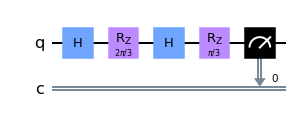

In [75]:
# Initial circuit with a rotation of pi-theta around the x axis and a rotation od phi around the z axis
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.rz(np.pi-theta, 0)
circuit.h(0)
circuit.rz(phi, 0)
circuit.measure(0, 0)

circuit.draw(output='mpl')

In [76]:
simulator = Aer.get_backend('qasm_simulator')

{'0': 249, '1': 751}


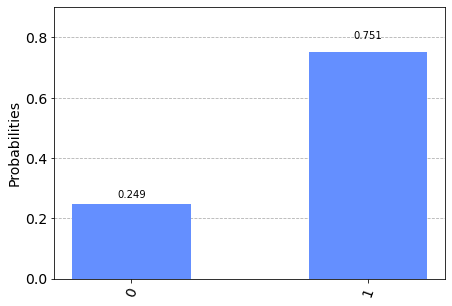

In [77]:
result = execute(circuit, backend = simulator, shots=1000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

In [78]:
n0 = counts.get('0')
n1 = counts.get('1')
p0 = n0/(n0+n1)
p1 = n1/(n0+n1)
print('theta is approximately ' + str(np.arcsin(np.sqrt(p0))*2)) # Equivalent: np.arccos(np.sqrt(p1))])
print('theta is approximately ' + str(np.arcsin(np.sqrt(p0))*2/np.pi) + '\u03C0')

theta is approximately 1.044886606403912
theta is approximately 0.3325977367593965π


In [58]:
# With IBMQ:
job = execute(circuit, backend=qcomp)

In [60]:
job_monitor(job)

Job Status: job has successfully run


{'0': 295, '1': 729}


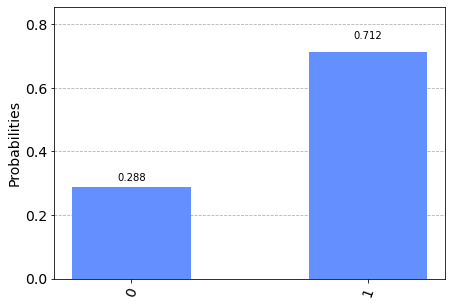

In [62]:
result = job.result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

In [63]:
# Measuring theta with real calculation
n0 = counts.get('0')
n1 = counts.get('1')
p0 = n0/(n0+n1)
p1 = n1/(n0+n1)
print('theta is approximately ' + str(np.arcsin(np.sqrt(p0))*2)) # Equivalent: np.arccos(np.sqrt(p1))])
print('theta is approximately ' + str(np.arcsin(np.sqrt(p0))*2/np.pi) + '\u03C0')

theta is approximately 1.133128661242156
theta is approximately 0.3606860551915818π


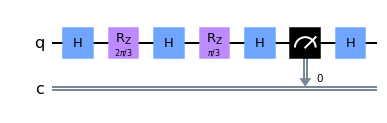

In [72]:
# Same circuit, measuring phi
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.rz(np.pi-theta, 0)
circuit.h(0)
circuit.rz(phi, 0)
circuit.h(0)
circuit.measure(0, 0)
circuit.h(0)

circuit.draw(output='mpl')

{'0': 875, '1': 125}


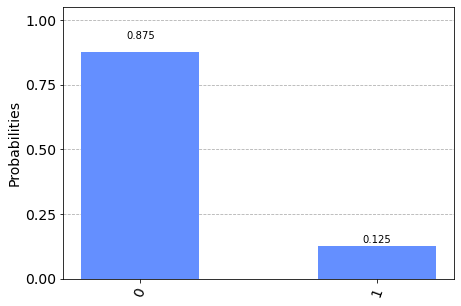

In [73]:
result = execute(circuit, backend = simulator, shots=1000).result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

In [74]:
n0 = counts.get('0')
n1 = counts.get('1')
p0 = n0/(n0+n1)
p1 = n1/(n0+n1)
print([p0, p1])
print(0.5*np.abs(np.sin(theta/2)+np.exp(phi*(0+1j))*np.cos(theta/2))**2) # = p0
print(0.5*np.abs(np.sin(theta/2)-np.exp(phi*(0+1j))*np.cos(theta/2))**2) # = p1

[0.875, 0.125]
0.7165063509461098
0.2834936490538903


In [79]:
# With IBMQ:
job = execute(circuit, backend=qcomp)

In [80]:
job_monitor(job)

Job Status: job has successfully run


{'0': 306, '1': 718}


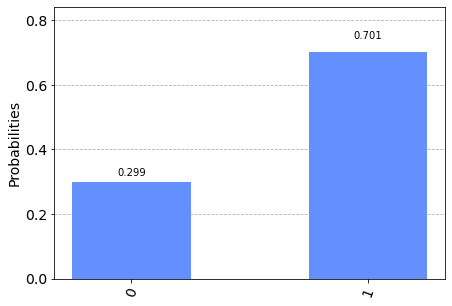

In [81]:
result = job.result()
counts = result.get_counts()

print(counts)
plot_histogram(counts)

In [82]:
n0 = counts.get('0')
n1 = counts.get('1')
p0 = n0/(n0+n1)
p1 = n1/(n0+n1)
print([p0, p1])
print(0.5*np.abs(np.sin(theta/2)+np.exp(phi*(0+1j))*np.cos(theta/2))**2) # = p0
print(0.5*np.abs(np.sin(theta/2)-np.exp(phi*(0+1j))*np.cos(theta/2))**2) # = p1

[0.298828125, 0.701171875]
0.7165063509461098
0.2834936490538903


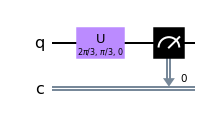

In [83]:
# Second circuit with a U3 gate with the same angles as before
circuit2 = QuantumCircuit(1, 1)
circuit2.u(np.pi - theta, phi, 0, 0)
circuit2.measure(0, 0)

circuit2.draw(output='mpl')

{'0': 260, '1': 740}


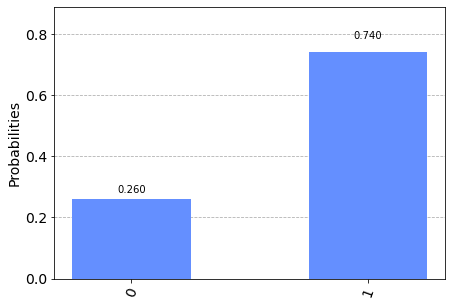

In [84]:
result2 = execute(circuit2, backend = simulator, shots=1000).result()
counts2 = result2.get_counts()

print(counts2)
plot_histogram(counts2)

In [85]:
n0 = counts2.get('0')
n1 = counts2.get('1')
p0 = n0/(n0+n1)
p1 = n1/(n0+n1)
print('theta is approximately ' + str(np.arcsin(np.sqrt(p0))*2)) # Equivalent: np.arccos(np.sqrt(p1))])
print('theta is approximately ' + str(np.arcsin(np.sqrt(p0))*2/np.pi) + '\u03C0')

theta is approximately 1.0701416143903084
theta is approximately 0.3406366554771171π


In [86]:
# With IBMQ:
job2 = execute(circuit2, backend=qcomp)

In [88]:
job_monitor(job2)

Job Status: job has successfully run


{'0': 290, '1': 734}


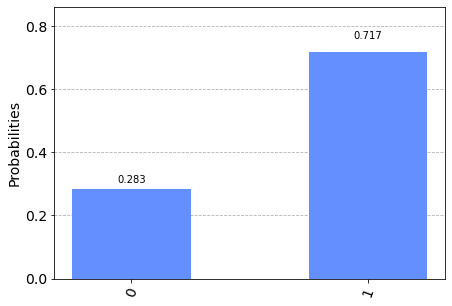

In [89]:
result = job2.result()
counts2 = result.get_counts()

print(counts2)
plot_histogram(counts2)

In [90]:
n0 = counts2.get('0')
n1 = counts2.get('1')
p0 = n0/(n0+n1)
p1 = n1/(n0+n1)
print('theta is approximately ' + str(np.arcsin(np.sqrt(p0))*2)) # Equivalent: np.arccos(np.sqrt(p1))])
print('theta is approximately ' + str(np.arcsin(np.sqrt(p0))*2/np.pi) + '\u03C0')

theta is approximately 1.122319214984851
theta is approximately 0.35724530158370926π


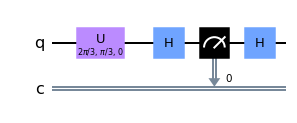

In [100]:
# U3 circuit, measuring phi
circuit2 = QuantumCircuit(1, 1)
circuit2.u(np.pi - theta, phi, 0, 0)
circuit2.h(0)
circuit2.measure(0, 0)
circuit2.h(0)

circuit2.draw(output='mpl')

{'0': 715, '1': 285}


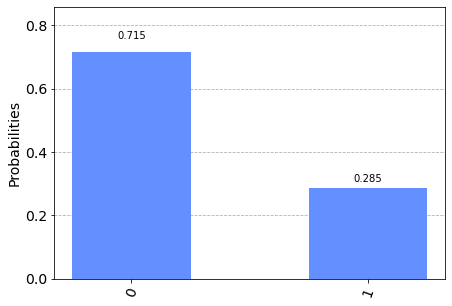

In [101]:
result2 = execute(circuit2, backend = simulator, shots=1000).result()
counts2 = result2.get_counts()

print(counts2)
plot_histogram(counts2)

In [102]:
n0 = counts2.get('0')
n1 = counts2.get('1')
p0 = n0/(n0+n1)
p1 = n1/(n0+n1)
print([p0, p1])
print(0.5*np.abs(np.sin(theta/2)+np.exp(phi*(0+1j))*np.cos(theta/2))**2) # = p0
print(0.5*np.abs(np.sin(theta/2)-np.exp(phi*(0+1j))*np.cos(theta/2))**2) # = p1

[0.715, 0.285]
0.7165063509461098
0.2834936490538903


In [103]:
# With IBMQ:
job2 = execute(circuit2, backend=qcomp)

In [104]:
job_monitor(job2)

Job Status: job incurred error    


In [ ]:
result = job2.result()
counts2 = result.get_counts()

print(counts2)
plot_histogram(counts2)

In [ ]:
n0 = counts2.get('0')
n1 = counts2.get('1')
p0 = n0/(n0+n1)
p1 = n1/(n0+n1)
print([p0, p1])
print(0.5*np.abs(np.sin(theta/2)+np.exp(phi*(0+1j))*np.cos(theta/2))**2) # = p0
print(0.5*np.abs(np.sin(theta/2)-np.exp(phi*(0+1j))*np.cos(theta/2))**2) # = p1